<a href="https://colab.research.google.com/github/KubraErensoy/TrendyolFinalProject/blob/main/Trendyol_Buzdolab%C4%B1_Fiyat_Tahmini_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [14]:
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import RidgeCV
import warnings
warnings.filterwarnings("ignore")

In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [21]:
data=pd.read_excel('trendyolregression.xlsx')


In [22]:
data.head(3)

,urun_adı,marka_adı,model_adı,toplam_hacim,yukseklik,genislik,dondurucu_ozelligi,tip,enerji_sınıfı,garanti_suresi,renk,derinlik,dondurucu_yeri,fiyat,yıldız,yorumlar,musteri_id
0,Bt 1001 A+ Office Desk Type Mini Refrigerator...,regal,IT,1,1,1,2,3,6,2,4,1,3,2205.00,3,bad service,54
1,Bt 1001 A+ Office Desk Type Mini Refrigerator...,regal,IT,1,1,1,2,3,6,2,4,1,3,2205.00,3,"REGAL MINI REFRIGERATOR WORKS VERY WELL, I REC...",55
2,Bt 1001 A+ Office Desk Type Mini Refrigerator...,regal,IT,1,1,1,2,3,6,2,4,1,3,2205.00,3,We bought it for our office. Pretty good cooli...,56


In [23]:
df = data.drop(['urun_adı', 'model_adı', 'yorumlar','musteri_id'], axis=1)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marka_adı           2176 non-null   object 
 1   toplam_hacim        2176 non-null   int64  
 2   yukseklik           2176 non-null   int64  
 3   genislik            2176 non-null   int64  
 4   dondurucu_ozelligi  2176 non-null   int64  
 5   tip                 2176 non-null   int64  
 6   enerji_sınıfı       2176 non-null   int64  
 7   garanti_suresi      2176 non-null   int64  
 8   renk                2176 non-null   int64  
 9   derinlik            2176 non-null   int64  
 10  dondurucu_yeri      2176 non-null   int64  
 11  fiyat               2176 non-null   float64
 12  yıldız              2176 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 221.1+ KB


In [25]:
# "marka_adı" burada object halindedir, bir sonrakinde dummy yapıcaz.
X=df.drop(["fiyat","marka_adı"], axis=1)
Y = df["fiyat"]

# perform train/val split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=20)

# fit linear regression to training data
lr_model = LinearRegression()

# fit linear model

lr_model.fit(x_train,y_train)
pred = lr_model.predict(x_val)

# calculating mse

print("MSE Value: ", np.mean((pred - y_val)**2), "\n")

# evaluation using r-square

print("R^2 Score Value (Test): ", lr_model.score(x_test, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model.score(x_val, y_val), "\n")

print("Coefficients:\n", lr_model.coef_)

MSE Value:  20145890.636970002 

R^2 Score Value (Test):  0.5992918466129171 

R^2 Score Value (Validation):  0.6718424579081956 

Coefficients:
 [ 2317.11947439 -1236.97169313  4389.73083455  -559.67384855
 -1126.39796026 -1538.14796831   927.93803142 -1905.96855516
   717.01411396 -3286.69713786  -203.59170119]


**Convert features to Dummy variablesi in "marka_adı"**

In [26]:
df = pd.get_dummies(df, columns=['marka_adı'])
df.head(3)

,toplam_hacim,yukseklik,genislik,dondurucu_ozelligi,tip,enerji_sınıfı,garanti_suresi,renk,derinlik,dondurucu_yeri,...,marka_adı_altus,marka_adı_backhoe,marka_adı_finlux,marka_adı_flavel,marka_adı_luck,marka_adı_profile,marka_adı_regal,marka_adı_silverline,marka_adı_theca,marka_adı_vestfrost
0,1,1,1,2,3,6,2,4,1,3,...,0,0,0,0,0,0,1,0,0,0
1,1,1,1,2,3,6,2,4,1,3,...,0,0,0,0,0,0,1,0,0,0
2,1,1,1,2,3,6,2,4,1,3,...,0,0,0,0,0,0,1,0,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   toplam_hacim            2176 non-null   int64  
 1   yukseklik               2176 non-null   int64  
 2   genislik                2176 non-null   int64  
 3   dondurucu_ozelligi      2176 non-null   int64  
 4   tip                     2176 non-null   int64  
 5   enerji_sınıfı           2176 non-null   int64  
 6   garanti_suresi          2176 non-null   int64  
 7   renk                    2176 non-null   int64  
 8   derinlik                2176 non-null   int64  
 9   dondurucu_yeri          2176 non-null   int64  
 10  fiyat                   2176 non-null   float64
 11  yıldız                  2176 non-null   int64  
 12  marka_adı_Arcelik       2176 non-null   uint8  
 13  marka_adı_Bosch         2176 non-null   uint8  
 14  marka_adı_Digitsu       2176 non-null   

**Dummy to Regression**

In [28]:
X2=df.drop(["fiyat"], axis=1)
Y = df["fiyat"]

# perform train/val split
x_train, x_test, y_train, y_test = train_test_split(X2, Y, test_size=0.20, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=20)

# fit linear regression to training data
lr_model = LinearRegression()

# fit linear model

lr_model.fit(x_train,y_train)
pred = lr_model.predict(x_val)

# calculating mse

print("MSE Value: ", np.mean((pred - y_val)**2), "\n")

# evaluation using r-square

print("R^2 Score Value (Test): ", lr_model.score(x_test, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model.score(x_val, y_val), "\n")

print("Coefficients:\n", lr_model.coef_)

MSE Value:  18686275.28803391 

R^2 Score Value (Test):  0.6720995858625407 

R^2 Score Value (Validation):  0.6956182141622949 

Coefficients:
 [ 1.80249967e+03 -6.40387966e+02  4.44709558e+03 -1.36051073e+03
 -7.96126261e+02 -1.06914318e+03  1.42083856e+03 -1.89504557e+03
  7.43875711e+02 -3.12447188e+03 -2.45361118e+02 -3.43098653e+03
  1.02965613e+03 -1.42242870e+03  2.23449082e+02  4.54747351e-12
 -3.30792817e+03 -8.46812518e+02 -8.16653177e+03  1.40643695e+04
  8.85242481e+02 -1.38612952e+03  1.21925434e+04 -1.76437762e+03
 -1.60411681e+03 -9.99416449e+02 -4.65041549e+03 -1.81079711e+03
 -3.06896022e+03 -2.76039170e+03 -2.23523904e+03  8.76235389e+01
 -2.45287685e+03 -7.59306945e+02  4.50700582e+03  8.79563660e+03
 -1.11881110e+03]


**Take log of "fiyat" and graph**

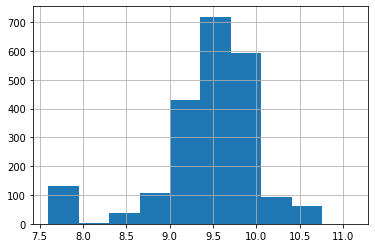

In [31]:
df['log_fiyat']=np.log(df.fiyat)
# looks better
df.log_fiyat.hist();

In [32]:
df.head()

,toplam_hacim,yukseklik,genislik,dondurucu_ozelligi,tip,enerji_sınıfı,garanti_suresi,renk,derinlik,dondurucu_yeri,...,marka_adı_backhoe,marka_adı_finlux,marka_adı_flavel,marka_adı_luck,marka_adı_profile,marka_adı_regal,marka_adı_silverline,marka_adı_theca,marka_adı_vestfrost,log_fiyat
0,1,1,1,2,3,6,2,4,1,3,...,0,0,0,0,0,1,0,0,0,7.70
1,1,1,1,2,3,6,2,4,1,3,...,0,0,0,0,0,1,0,0,0,7.70
2,1,1,1,2,3,6,2,4,1,3,...,0,0,0,0,0,1,0,0,0,7.70
3,1,1,1,2,3,6,2,4,1,3,...,0,0,0,0,0,1,0,0,0,7.70
4,1,1,1,2,3,6,2,4,1,3,...,0,0,0,0,0,1,0,0,0,7.70


In [35]:
#log to fiyat
X3=df.drop(["log_fiyat","fiyat"], axis=1)
Y = df["log_fiyat"]

# perform train/val split
x_train, x_test, y_train, y_test = train_test_split(X3, Y, test_size=0.20, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=20)

# fit linear regression to training data
lr_model = LinearRegression()

# fit linear model

lr_model.fit(x_train,y_train)
pred = lr_model.predict(x_val)

# calculating mse

print("MSE Value: ", np.mean((pred - y_val)**2), "\n")

# evaluation using r-square

print("R^2 Score Value (Test): ", lr_model.score(x_test, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model.score(x_val, y_val), "\n")

print("Coefficients:\n", lr_model.coef_)

MSE Value:  0.03659110924584567 

R^2 Score Value (Test):  0.906797958096965 

R^2 Score Value (Validation):  0.9005433028299825 

Coefficients:
 [ 3.45733562e-01  5.09250808e-03  2.49630160e-01  2.52407384e-02
 -1.51671969e-02 -9.25139478e-02  1.60921615e-01 -9.04968228e-02
  5.24211747e-02 -1.77603364e-01 -1.07562365e-02 -1.80053519e-01
  7.47816323e-02 -3.52893002e-01  3.45336225e-01  8.18789481e-16
  1.26457440e-03  7.34780745e-02 -6.36021144e-01  1.57069149e+00
  9.19112174e-02 -7.65747811e-02  4.91568408e-01 -1.15858144e-01
 -2.79435893e-01 -5.10929529e-02 -5.45783219e-01 -1.67087116e-01
 -1.96940983e-01 -2.92785911e-01 -4.76836929e-01  6.13793988e-02
 -1.46093026e-01 -1.25106926e-01  3.03246859e-01  9.03672811e-01
 -2.74767139e-01]


**Ridge and Lasso Regression**

In [36]:
df.drop(["fiyat"], axis = 1, inplace = True)


In [37]:
X, y = df.drop('log_fiyat',axis=1), df['log_fiyat']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05,normalize=True)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [38]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')


Linear Regression val R^2: 0.894
Ridge Regression val R^2: 0.892
Degree 2 polynomial regression val R^2: -1071260658089971712.000


In [39]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.900


In [40]:
lm.fit(X,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.898


In [53]:
df.dtypes

toplam_hacim                int64
yukseklik                   int64
genislik                    int64
dondurucu_ozelligi          int64
tip                         int64
enerji_sınıfı               int64
garanti_suresi              int64
renk                        int64
derinlik                    int64
dondurucu_yeri              int64
yıldız                      int64
marka_adı_Arcelik           uint8
marka_adı_Bosch             uint8
marka_adı_Digitsu           uint8
marka_adı_Electrolux        uint8
marka_adı_Electromarly      uint8
marka_adı_Franke            uint8
marka_adı_Grundig           uint8
marka_adı_Hoover            uint8
marka_adı_LA                uint8
marka_adı_LG                uint8
marka_adı_Samsung           uint8
marka_adı_Sharp             uint8
marka_adı_Siemens           uint8
marka_adı_Sunny             uint8
marka_adı_VESTEL            uint8
marka_adı_Windsor           uint8
marka_adı_altus             uint8
marka_adı_backhoe           uint8
marka_adı_finl

In [54]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('log_fiyat ~ toplam_hacim+yukseklik+genislik+dondurucu_ozelligi+tip+enerji_sınıfı+garanti_suresi+renk+derinlik+dondurucu_yeri+yıldız+marka_adı_Arcelik+marka_adı_Bosch+marka_adı_Digitsu+marka_adı_Electrolux+marka_adı_Electromarly+marka_adı_Franke+marka_adı_Grundig+marka_adı_Hoover+marka_adı_LA+marka_adı_LG+marka_adı_Samsung+marka_adı_Sharp+marka_adı_Siemens+marka_adı_Sunny+marka_adı_VESTEL+marka_adı_Windsor+marka_adı_altus+marka_adı_backhoe+marka_adı_finlux+marka_adı_flavel+marka_adı_luck+marka_adı_profile+marka_adı_regal+marka_adı_silverline+marka_adı_theca+marka_adı_vestfrost', data=df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_fiyat   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     579.7
Date:                Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:30:36   Log-Likelihood:                 630.35
No. Observations:                2176   AIC:                            -1187.
Df Residuals:                    2139   BIC:                            -976.3
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8.1248      0.091     89.761      0.000       7.947       8.302
toplam_hacim               0.3074      0.017     18.113      0.000       0.274       0.341
yukseklik                  0.0255      0.011      2.267      0.024       0.003       0.048
genislik                   0.2497      0.009     28.811      0.000       0.233       0.267
dondurucu_ozelligi         0.0398      0.021      1.893      0.059      -0.001       0.081
tip                       -0.0198      0.005     -4.182      0.000      -0.029      -0.011
enerji_sınıfı             -0.0998      0.007    -14.214      0.000      -0.114      -0.086
garanti_suresi             0.1703      0.017     10.264      0.000       0.138       0.203
renk                      -0.0792      0.006    -12.397      0.000      -0.092      -0.067
derinlik                   0.0509      0.007      6.999      0.000       0.037       0.065
dondurucu_yeri            -0.1646      0.010    -16.973      0.000      -0.184      -0.146
yıldız                    -0.0279      0.010     -2.784      0.005      -0.048      -0.008
marka_adı_Arcelik          0.1574      0.032      4.979      0.000       0.095       0.219
marka_adı_Bosch            0.3983      0.024     16.453      0.000       0.351       0.446
marka_adı_Digitsu         -0.1048      0.036     -2.921      0.004      -0.175      -0.034
marka_adı_Electrolux       0.5212      0.060      8.635      0.000       0.403       0.640
marka_adı_Electromarly     0.4565      0.129      3.528      0.000       0.203       0.710
marka_adı_Franke           0.3382      0.180      1.883      0.060      -0.014       0.690
marka_adı_Grundig          0.3733      0.033     11.285      0.000       0.308       0.438
marka_adı_Hoover          -0.2802      0.178     -1.574      0.116      -0.629       0.069
marka_adı_LA               2.0868      0.129     16.189      0.000       1.834       2.340
marka_adı_LG               0.4235      0.025     17.231      0.000       0.375       0.472
marka_adı_Samsung          0.2433      0.023     10.586      0.000       0.198       0.288
marka_adı_Sharp            0.8065      0.055     14.586      0.000       0.698       0.915
marka_adı_Siemens          0.2123      0.033      6.492      0.000       0.148       0.276
marka_adı_Sunny           -0.0552      0.051     -1.079      0.281      -0.155       0.045
marka_adı_VESTEL           0.2517      0.023     11.069      0.000       0.207       0.296
marka_adı_Windsor         -0.2295      0.043     -5.387      0.000      -0.313      -0.146
marka_adı_altus            0.1341      0.024      5.686      0.000       0.088       0.180
marka_adı_backhoe          0.1305      0.034      3.800      0.000       0.063       0.198
marka_adı_finlux          -0.0091      0.075     -0.121      0.903      -0.156  

**Cross Validation**

In [44]:
df1=df.copy()


In [45]:
df1

,toplam_hacim,yukseklik,genislik,dondurucu_ozelligi,tip,enerji_sınıfı,garanti_suresi,renk,derinlik,dondurucu_yeri,...,marka_adı_backhoe,marka_adı_finlux,marka_adı_flavel,marka_adı_luck,marka_adı_profile,marka_adı_regal,marka_adı_silverline,marka_adı_theca,marka_adı_vestfrost,log_fiyat
0,1,1,1,2,3,6,2,4,1,3,...,0,0,0,0,0,1,0,0,0,7.70
1,1,1,1,2,3,6,2,4,1,3,...,0,0,0,0,0,1,0,0,0,7.70
2,1,1,1,2,3,6,2,4,1,3,...,0,0,0,0,0,1,0,0,0,7.70
3,1,1,1,2,3,6,2,4,1,3,...,0,0,0,0,0,1,0,0,0,7.70
4,1,1,1,2,3,6,2,4,1,3,...,0,0,0,0,0,1,0,0,0,7.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,2,1,1,2,1,7,2,4,1,3,...,0,1,0,0,0,0,0,0,0,7.86
2172,4,3,3,3,5,6,3,3,5,3,...,0,0,0,0,0,0,0,0,0,9.68
2173,2,1,1,3,1,6,2,4,1,2,...,0,0,0,0,0,0,0,0,0,9.97
2174,1,1,1,2,3,6,3,2,1,3,...,0,0,0,0,0,0,0,0,0,8.41


In [46]:
#Cross-Validation / Test
from sklearn.model_selection import KFold

X, y = df1.drop('log_fiyat',axis=1), df1['log_fiyat']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [47]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=0.5)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')


Simple regression scores:  [0.8800165439349972, 0.8783093865521906, 0.9158431621773419, 0.9165758370201835, 0.897020756544892]
Ridge scores:  [0.8798735058115631, 0.8775691354157997, 0.9158304221952369, 0.9173938586898527, 0.8970268736114003] 

Simple mean cv r^2: 0.898 +- 0.017
Ridge mean cv r^2: 0.898 +- 0.017


In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.901


**K-fold, in a Less Manual Way with Scikit-learn**


In [49]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X, y, # estimator, features, target
                cv=10, # number of folds 
                scoring='r2') # scoring metric

array([ 9.20820857e-01,  9.12609047e-01,  8.68603484e-01,  8.56399241e-01,
        9.05713892e-01,  8.76877122e-01, -1.92248742e+22,  9.02960571e-01,
        8.99179368e-01,  9.14359566e-01])

In [50]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, X, y, cv=kf, scoring='r2')

array([0.88001654, 0.87830939, 0.91584316, 0.91657584, 0.89702076])

In [51]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))

0.9006844369002881
0.8977021995906339
